<a href="https://colab.research.google.com/github/PreethiPara/Water_quality_prediction/blob/main/Water_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
df.shape

(3276, 10)

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
#In sulphate there are 781 null values
df['Sulfate'].mean()

333.77577661081335

In [ ]:
df.fillna(df.mean(),inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

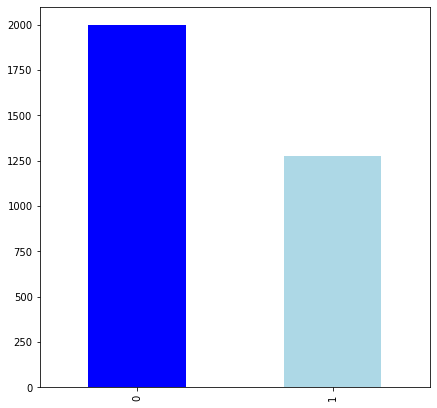

In [ ]:
df.Potability.value_counts().plot.bar(figsize=(7,7),color=['blue','lightblue'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


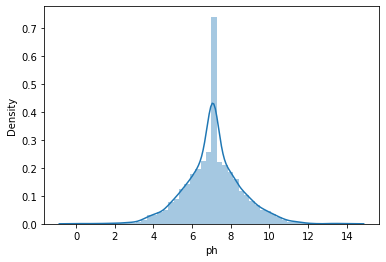

In [ ]:
sns.distplot(df.ph)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f197720c390>,
      dtype=object)

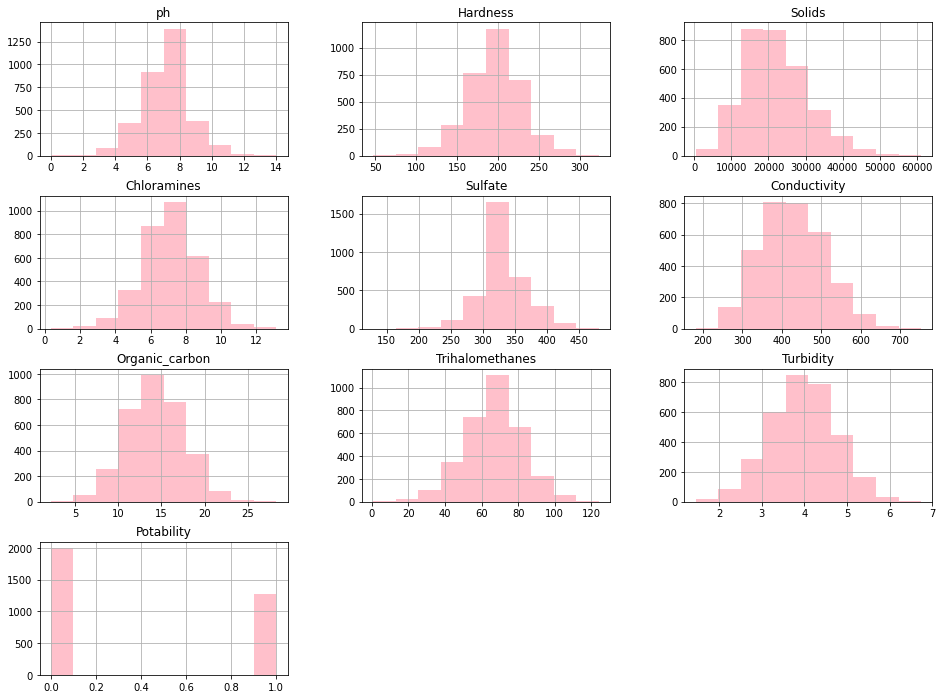

In [ ]:
df.hist(bins=10,figsize=(16,12),color='pink')

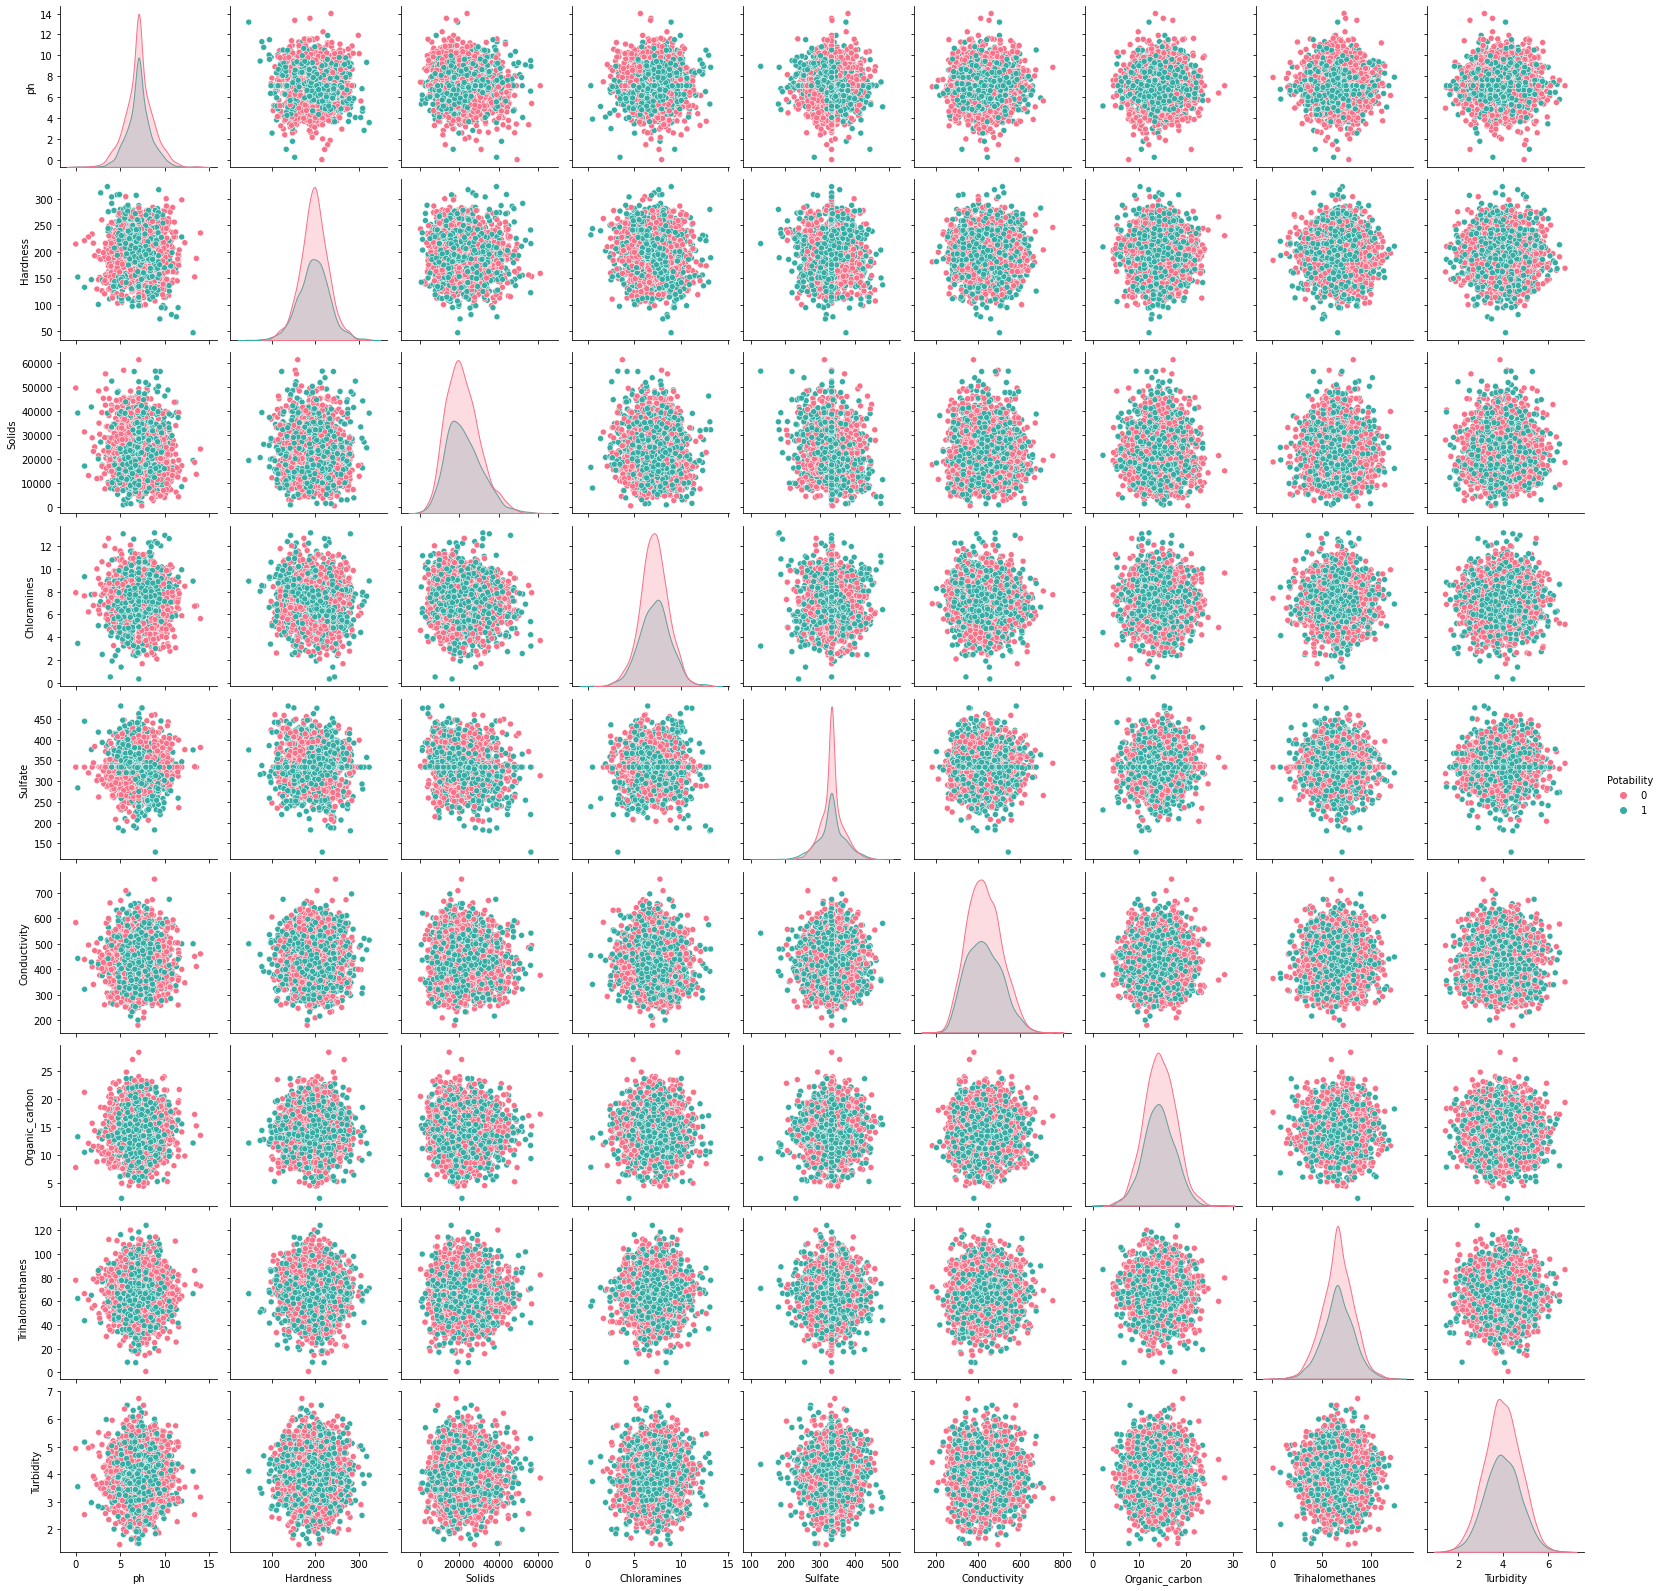

In [ ]:
sns.pairplot(df,hue='Potability',palette='husl',kind='scatter')

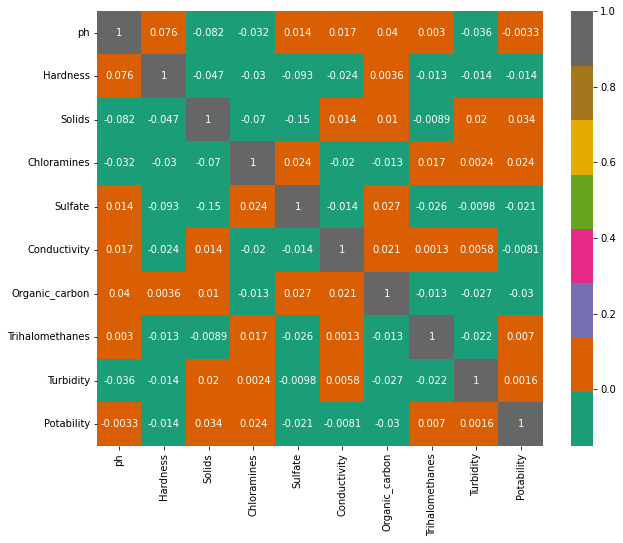

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Dark2')

*Negatively correlated ones*
#####**Potability is inversely proportional to Organic carbon, Conductivity, Sulfate, and Hardness**
#####**pH and Turbdidity, Solids, Chloramines**
#####**Turbidity and sulfate**


In [ ]:
x=df.drop(['Potability'],axis=1)
y=df.Potability
print(x)
print(y)

            ph    Hardness  ...  Trihalomethanes  Turbidity
0     7.080795  204.890455  ...        86.990970   2.963135
1     3.716080  129.422921  ...        56.329076   4.500656
2     8.099124  224.236259  ...        66.420093   3.055934
3     8.316766  214.373394  ...       100.341674   4.628771
4     9.092223  181.101509  ...        31.997993   4.075075
...        ...         ...  ...              ...        ...
3271  4.668102  193.681735  ...        66.687695   4.435821
3272  7.808856  193.553212  ...        66.396293   2.798243
3273  9.419510  175.762646  ...        69.845400   3.298875
3274  5.126763  230.603758  ...        77.488213   4.708658
3275  7.874671  195.102299  ...        78.698446   2.309149

[3276 rows x 9 columns]
0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)


In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(3276, 9) (2620, 9) (656, 9)


In [ ]:
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
scaler.fit(x_test)
x_test=scaler.transform(x_test)
print(x_train)

[[0.64127299 0.54975947 0.32680881 ... 0.66750664 0.51466983 0.33087533]
 [0.56695659 0.4461984  0.10352687 ... 0.80214376 0.59262556 0.533343  ]
 [0.36779523 0.54735154 0.27048743 ... 0.39505313 0.53251103 0.64079716]
 ...
 [0.50577104 0.34354847 0.73589723 ... 0.70519357 0.56327489 0.59646905]
 [0.34386683 0.57231273 0.28452682 ... 0.33714238 0.37858112 0.70728905]
 [0.50577104 0.4886971  0.49791066 ... 0.47939788 0.85698528 0.45486348]]


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred=model1.predict(x_train)
accuracy=accuracy_score(y_train,pred)
print(accuracy)

1.0


In [ ]:
pred_on_test_data=model1.predict(x_test)
accuracy=accuracy_score(y_test,pred_on_test_data)
a=accuracy*100
print(f'Decision Tree classifier accuracy on testing: {a} %')


Decision Tree classifier accuracy on testing: 59.60365853658537 %


Text(69.0, 0.5, 'Truth')

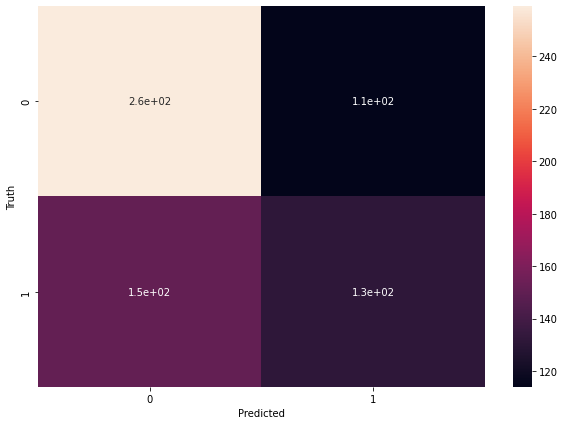

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_on_test_data)
cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=30)
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [ ]:
pred=model2.predict(x_train)
accuracy=accuracy_score(y_train,pred)
print(accuracy)

0.999618320610687


Random Forest Classifier Accuracy:64.32926829268293 %


Text(69.0, 0.5, 'Truth')

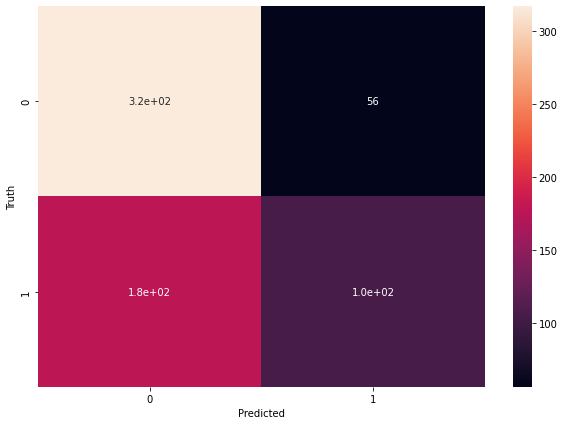

In [ ]:
pred_on_test_data=model2.predict(x_test)
accuracy=accuracy_score(y_test,pred_on_test_data)
b=accuracy*100
print(f'Random Forest Classifier Accuracy:{b} %')


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_on_test_data)
cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Support vector machine
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train,y_train)

SVC()

0.7122137404580152
SVM Classifier Accuracy:65.85365853658537 %


Text(69.0, 0.5, 'Truth')

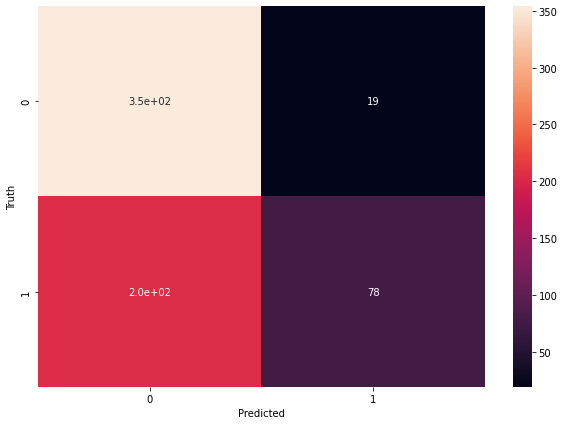

In [ ]:
pred=model3.predict(x_train)
accuracy=accuracy_score(y_train,pred)
print(accuracy)


pred_on_test_data=model3.predict(x_test)
accuracy=accuracy_score(y_test,pred_on_test_data)
c=accuracy*100
print(f'SVM Classifier Accuracy:{c} %')



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_on_test_data)
cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

K Neighbors Classifier Accuracy:67.13740458015268 %
0.6204268292682927


Text(69.0, 0.5, 'Truth')

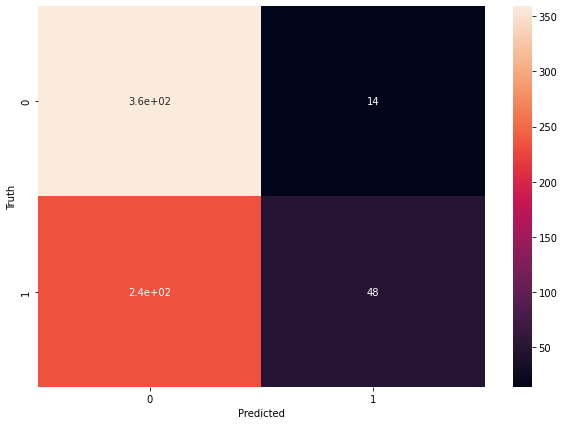

In [ ]:
## KNN

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
pred1=knn.predict(x_train)
accuracy=accuracy_score(y_train,pred1)
d=accuracy*100
print(f'K Neighbors Classifier Accuracy:{d} %')

pred2=knn.predict(x_test)
accuracy=accuracy_score(y_test,pred2)
print(accuracy)

from sklearn.metrics import confusion_matrix
pred2=knn.predict(x_test)
cm = confusion_matrix(y_test, pred2)
cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

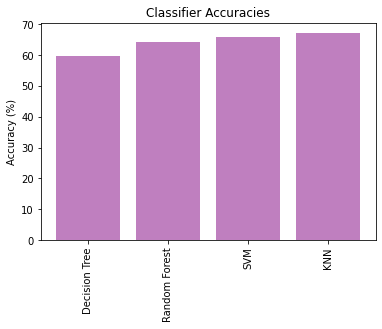

In [ ]:
predictors_group=('Decision Tree','Random Forest','SVM','KNN')
x_pos=np.arange(len(predictors_group))
accuracies=[a,b,c,d]
plt.bar(x_pos,accuracies,align='center',alpha=0.5,color='purple')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

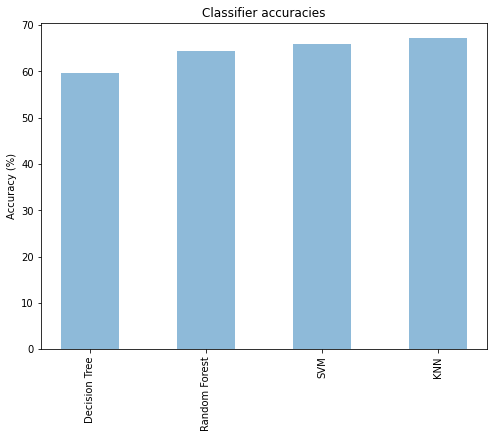

In [ ]:
data_dict={'Decision Tree':a,'Random Forest':b,'SVM':c,'KNN':d}
models=list(data_dict.keys())
values=list(data_dict.values())
plt.figure(figsize=(8,6))
plt.bar(models,values,width=0.5,alpha=0.5)
plt.xticks(rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier accuracies')
plt.show()

#####**Reducing Overfitting using cross validation**

In [ ]:
models_accuracies=[]
models_accuracies.append(('DT',DecisionTreeClassifier()))
models_accuracies.append(('RF',RandomForestClassifier()))
models_accuracies.append(('SVM',SVC()))
models_accuracies.append(('KN',KNeighborsClassifier()))

print(models_accuracies)


[('DT', DecisionTreeClassifier()), ('RF', RandomForestClassifier()), ('SVM', SVC()), ('KN', KNeighborsClassifier())]


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf=KFold(n_splits=30,random_state=1,shuffle=True)
kf.get_n_splits(x)
print(kf)
acc=[]
model_name=[]

for name,model in models_accuracies:
  acc_of_model=cross_val_score(model,x_train,y_train,cv=kf,scoring='accuracy')
  acc.append(acc_of_model)
  model_name.append(name)

N=len(acc)
print(N)
i=0
print(f'Original accuracies:\nDecision Tree Classifier:{a} \nRandom Forest Classifier : {b}  \nSVM : {c}\n Knn: {d}')

for i in range(N):
   print(f'{model_name[i]}: {acc[i].mean()*100} %')




KFold(n_splits=30, random_state=1, shuffle=True)
4
Original accuracies:
Decision Tree Classifier:59.60365853658537 
Random Forest Classifier : 64.32926829268293  
SVM : 65.85365853658537
 Knn: 67.13740458015268
DT: 57.945837687216994 %
RF: 67.44470567746428 %
SVM: 67.36590038314174 %
KN: 62.93887147335423 %


In [ ]:
accc=cross_val_score(DecisionTreeClassifier(),x_train,y_train,cv=50,scoring='accuracy')
print(accc.mean()*100)
accc=cross_val_score(RandomForestClassifier(),x_train,y_train,cv=50,scoring='accuracy')
print(accc.mean()*100)

59.382438316400574
67.28592162554428


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


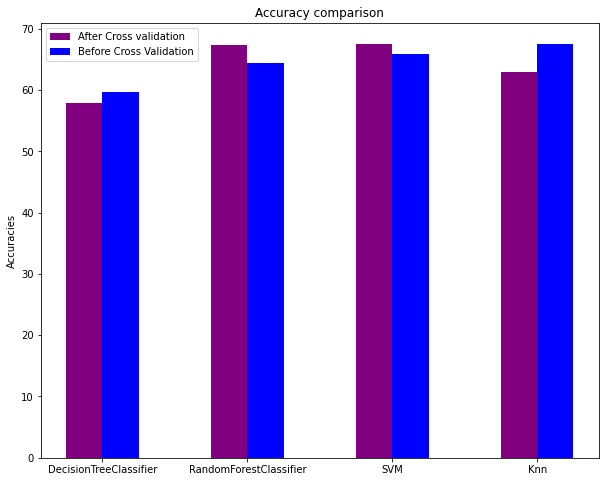

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

labels=['DecisionTreeClassifier','RandomForestClassifier','SVM','Knn']
Before_cross_validation=[59.6,64.329,65.85,67.4447]
After_cross_validation=[57.938931297709914, 67.32824427480917 ,67.55725190839695 , 62.90076335877862]
#x=0,1,2,3,4
x=np.arange(len(labels))
width=0.25

a,b=plt.subplots(figsize=(10,8))
p1=b.bar(x-width/2,After_cross_validation,width,label='After Cross validation',color='purple')
p2=b.bar(x+width/2,Before_cross_validation,width,label='Before Cross Validation',color='blue')

b.set_ylabel('Accuracies')
b.set_title('Accuracy comparison')
b.set_xticks(x)
b.set_xticklabels(labels)
b.legend(loc='top right')
plt.show()

